In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = x_1 + e
    return y, x_1, x_2

In [3]:
# Setup test
def setup_test_params(y, x_1, x_2):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    return ols, ridge, lasso 

In [4]:
# Scatterplots
def params_scatterplot(x):
    for model in list(setup_test_params(y, x_1, x_2)):
        plt.scatter(range(len(model.params)), model.params)
        plt.legend(['ols', 'ridge', 'lasso'])

In [5]:
# MSE
def setup_test_mse(y, x_1, x_2, k):
    y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
    lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
    ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
    return ols_mse, lasso_mse, ridge_mse

In [6]:
# Calculate MSEs
def mse(lst):
    df = pd.DataFrame(lst, columns=['ols_mse', 'lasso_mse', 'ridge_mse'])
    df['diff_ols_lasso'] = df['ols_mse'] - df['lasso_mse']
    df['diff_ols_ridge'] = df['ols_mse'] - df['ridge_mse']
    df['diff_lasso_ridge'] = df['ridge_mse'] - df['lasso_mse']
    lst_cols = ['diff_ols_lasso','diff_ols_ridge','diff_lasso_ridge']
    for i in lst_cols:
        sd = df[i].std()
        df[i] = -1*df[i]/sd * math.sqrt(1000)
    plt.hist(df['diff_ols_lasso'],label='diff_ols_lasso')
    plt.hist(df['diff_ols_ridge'],label='diff_ols_ridge')
    plt.hist(df['diff_lasso_ridge'],label='diff_lasso_ridge')
    plt.legend()
    plt.show()

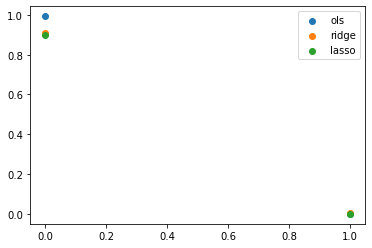

In [14]:
# num_cov = 1
k = 1
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

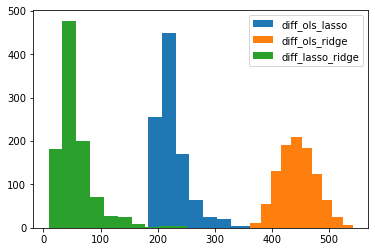

In [8]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)

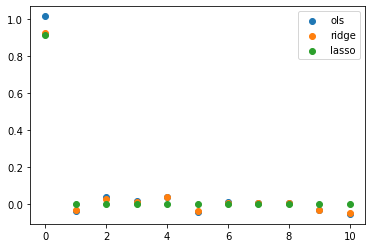

In [9]:
# num_cov = 10
k = 10
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

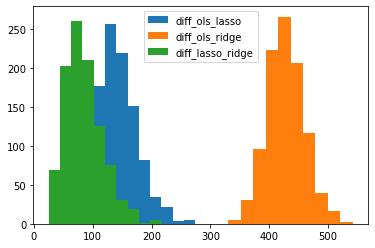

In [10]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)